In [24]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
%matplotlib inline

In [25]:
buss= pd.read_csv('csv/DBData.csv')

In [26]:
buss.head(5)

,"﻿""Country Name""",Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 16
0,Afghanistan,AFG,Building quality control index (0-15),IC.DCP.BQCI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,2.5,2.5,NaN
1,Afghanistan,AFG,Cost – Women (% of income per capita),IC.REG.COST.PC.ZS.WOMEN,75.2,67.4,84.6,59.5,30.2,26.7,25.8,22.5,14.4,15.1,19.0,19.9,NaN
2,Afghanistan,AFG,Cost to build a warehouse (% of income per cap...,IC.DCP.COST,208.5,193.0,200.5,140.9,121.6,107.2,100.8,89.1,83.8,74.4,76.6,82.7,NaN
3,Afghanistan,AFG,Cost to enforce a contract (% of claim),IC.EC.COST,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,NaN
4,Afghanistan,AFG,Cost to export: Documentary compliance (USD),IC.EXP.COST.EXP.DOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344.0,344.0,344.0,NaN


In [27]:
bcos = buss[buss['Indicator Code']=='IC.REG.COST.PC.ZS']

In [28]:
#objects = bcos['Country Code']
#y_pos = np.arange(len(objects))
#cost = bcos['2016']
#plt.bar(y_pos, cost, align='center', alpha=0.5)

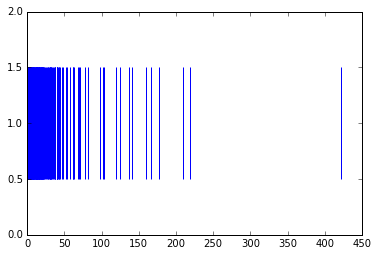

In [29]:
plt.eventplot(bcos['2016'].dropna().values)

-813.10167205976359

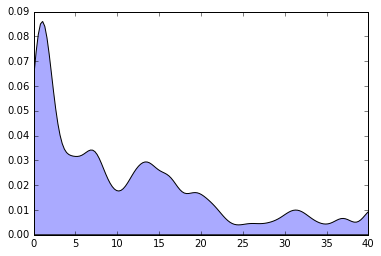

In [30]:
f, ax = plt.subplots()
X = bcos['2016'].dropna().values[:, np.newaxis]
X_plot = np.linspace(-20, 240, 1000)[:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=1.1).fit(X)
log_dens = kde.score_samples(X_plot)
ax.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax.set_xlim(0, 40)
#ax.set_ylim(0,0.015)
kde.score(X)

In [31]:
#Cost of start a bussines (% of income per capita)
#bcostdata = bcos.ix[:, [0,1,15]].dropna()
#bcostdata.set_index('Country Code', inplace=True)

# plotting the map

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from geonamescache import GeonamesCache
from helpers import slug
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
shapefile = 'countries/ne_10m_admin_0_countries_lakes'
year = '2016'
title = 'Forest area as percentage of land area in {}'.format(year)

descripton = '''
Data: Doing Business, The World Bank -http://www.doingbusiness.org  • Author: Mayra Cervantes '''.strip()

In [33]:
gc = GeonamesCache()
iso3_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

In [34]:
bcos.set_index('Country Code', inplace=True)
bcostdata = bcos.ix[iso3_codes, [0,14]].dropna()

In [38]:
binsnonuniform = np.array([0,4, 10, 18, 24, 35,45, 60, 100,150, 430],
                          dtype=np.float64)
values = bcostdata['2016']
num_colors = len(binsnonuniform)
cm = plt.get_cmap('RdYlGn_r')
scheme = [cm(i / num_colors) for i in range(num_colors)]
bcostdata['bin'] = np.digitize(values, binsnonuniform)
bcostdata.sort_values('bin', ascending=False).head(5)

,"﻿""Country Name""",2016,bin
Country Code,,,
SOM,Somalia,176.5,10
TCD,Chad,159.8,10
HTI,Haiti,219.3,10
CAF,Central African Republic,209.4,10
SSD,South Sudan,422.4,10


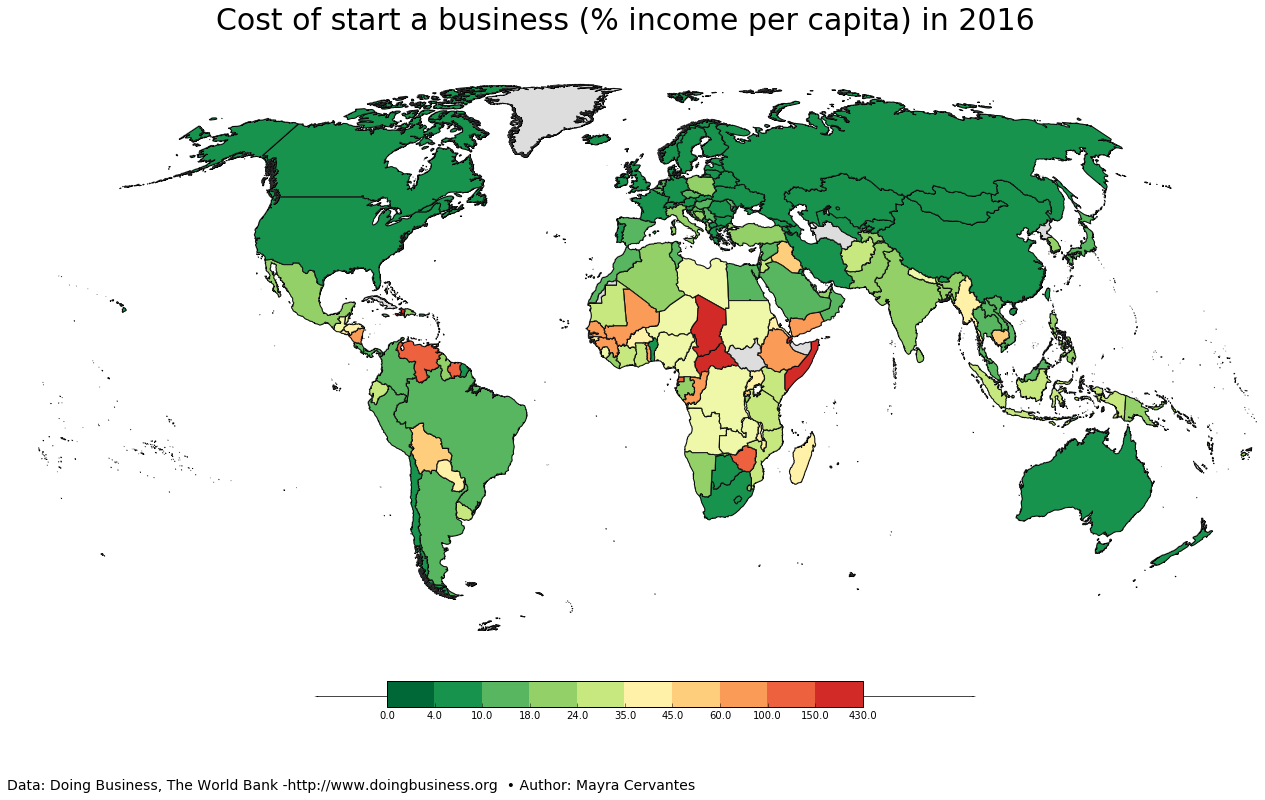

In [39]:
fig = plt.figure(figsize=(22, 12))

ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('Cost of start a business (% income per capita) in {}'.format(year), fontsize=30, y=.95)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')

m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
for info, shape in zip(m.units_info, m.units):
    iso3 = info['ADM0_A3']
    if iso3 not in bcostdata.index:
        color = '#dddddd'
    else:
        color = scheme[bcostdata.ix[iso3]['bin']]
    
    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)
    
# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

# Draw color legend.
lticks = np.arange(num_colors)
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, orientation='horizontal',
                  boundaries =lticks, ticks=lticks )
cb.ax.set_xticklabels([str(round(i, 1)) for i in binsnonuniform ])
plt.annotate(descripton, xy=(-.8, -3.2), size=14, xycoords='axes fraction')
plt.savefig('coststartbusiness.png', bbox_inches='tight', pad_inches=.2)